# GRIP 2021 | The Sparks Foundation

### DATA SCIENCE & BUSINESS ANALYTICS TASKS

   ## _AUTHOR : MAHASHRUTHI KB_

# TASK 1 - Prediction using Supervised ML

### OBJECTIVE: To predict the score of the student based on the study hours using _simple linear regression_

In [17]:
#import necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
#for simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

In [3]:
#read and display the data
url = "http://bit.ly/w-data"
df=pd.read_csv(url)          
print("Data imported")
df.tail()

Data imported


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
#counting the number of students
print('No of students = ' ,df.shape[0])

No of students =  25


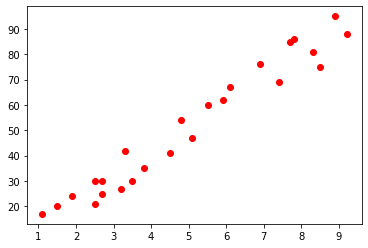

In [16]:
#visualising the data to find the relationship
plt.scatter(X, y, color='red')

_We can see that there is a positive relationship between the score of the student and the hours spent to study._

In [7]:
#dividing the data into attributes and labels
X = df.iloc[:, :-1].values  #2D array
y = df.iloc[:, 1].values    #1D array

In [8]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [9]:
#fitting the data in a simple linear regresssion model
SLRmodel = LinearRegression()
SLRmodel.fit(X_train, y_train)

LinearRegression()

In [10]:
#displaying the coefficent and intercept of the regression model
print("Coefficient of regression = ", SLRmodel.coef_[0])
print("Intercept = ", SLRmodel.intercept_)

Coefficient of regression =  10.053128689492324
Intercept =  1.3923258559622198


In [11]:
#equation of the regression model
#y=ax+b
print("Equation of the regression model")
print("\ty = ",round(SLRmodel.coef_[0],3),"x + ", round(SLRmodel.intercept_,3))

Equation of the regression model
	y =  10.053 x +  1.392


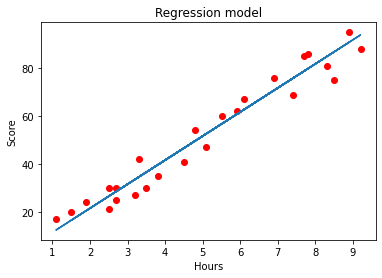

In [14]:
#fitting the model in the graph with the regression line
line = SLRmodel.coef_*X+SLRmodel.intercept_
plt.scatter(X, y, color="red")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Regression model")
plt.plot(X, line);
plt.show()

In [17]:
#predicting the test results
print(X_test)
pred_y = SLRmodel.predict(X_test)
pred_y

[[3.8]
 [5.5]
 [1.5]
 [9.2]
 [8.3]]


array([39.59421488, 56.68453365, 16.47201889, 93.8811098 , 84.83329398])

In [18]:
#compairing the actual and predicted values from the data
df1 = pd.DataFrame({"Actual":y_test,"Predicted":pred_y})
df1

,Actual,Predicted
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


In [34]:
#calculating the R-squared value 
print("R_squared value :",round(r2_score(y_test,pred_y),6))

#mean squared error to test the performance of the model
print("RMSE : ",round(np.sqrt(mean_squared_error(y_test, pred_y)),6))

R_squared value : 0.972394
RMSE :  4.331914


##### What will be predicted score if a student studies for 9.25 hrs/ day?

In [47]:
#prediction for the given data
hour = float(input("Enter the study hours(in hr) :"))
pred = SLRmodel.predict([[hour]])
print("Predicted Score = ",round(pred[0],2))

Enter the study hours(in hr) :9.25
Predicted Score =  94.38
